# Menu
* '*' helping functions

#### *Configuration

In [1]:
%matplotlib widget
from geometria import *
from graph import *
from trig import *
from visible_vertices import *
from shortest_path import *

#### Draw
Draw figures counter-clockwise!
Last edge would be corrected in case you do not hit a starting point(it will close the figure).

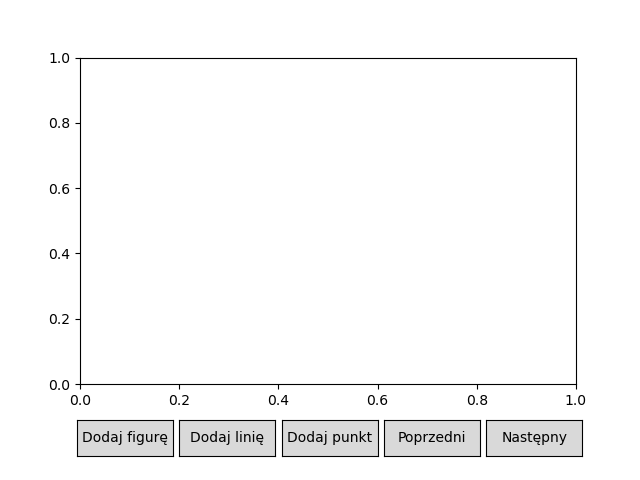

In [4]:
plot1 = Plot(points=[ PointsCollection([])])
plot1.draw()

### Save drawn figure to the file
You need a name for file!

In [5]:
Drawn_Figure = plot1.get_added_figure()
for figure in Drawn_Figure:
    if figure.lines[0][0] != figure.lines[-1][1]: 
        figure.lines[-1] = (figure.lines[-1][0], figure.lines[0][0])
plot2 = Plot([plot1.get_added_elements()])
# plot2.draw()

file_name = input("Nazwij swoją fiugrę!")
with open(file_name, 'w') as file:
    file.write(plot2.toJson())

### See the drawing

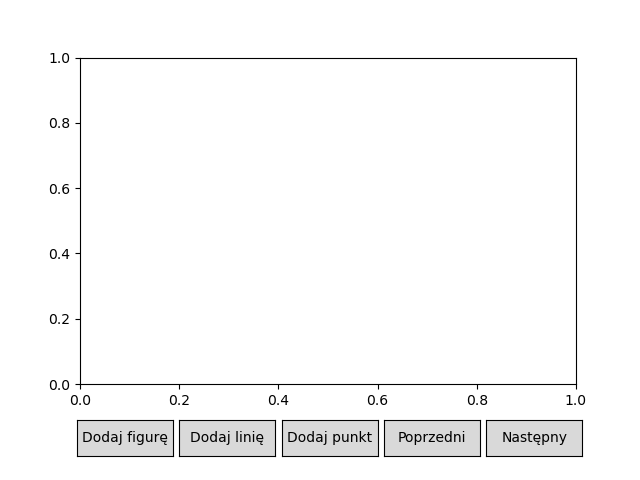

In [6]:
file_name = input("Type name of saved drawing!")
with open(file_name, 'r') as file:
    json = file.read()
plot_from_file = Plot(json=json)
plot_from_file.draw()

# Visible Graph
straszny makaron, trzeba będzie dużo poprawić - pewnie wywalić niemal całe :(
w ogóle sortedset chyba nie spełnia swojej roli

In [7]:
from sortedcollections import SortedSet
from trig import sort_by_angle, edge_intersect, on_segment
from graph import Edge


""" Should return all visible points from p"""
def visible_vertecies(p, points):
    n = len(points)
    sorted_points = sort_by_angle(p, points)
    t_state = SortedSet() # probably need tree not SortedSet
    W = []
    for i, w in enumerate(sorted_points):
        if visible(i, w):
            W.append(w)
        # insert edges to t_state on clockwise side
        # delete edges from t_state on counter-clockwise side


    """ Should check visibility of point w from p"""
    def visible(i, w):
        pw = Edge(p, w)
        if edge_intersect_with_graph(pw, w.parent_graph): # ! no edge_intersect_with_graph function and no w.parent_graph !
            return False
        elif i == 0 or not on_segment(p, sorted_points[i-1], w):
            if len(t_state) > 0 and edge_intersect(t_state[0], pw):
                return True
            else:
                return None
        elif sorted_points[i-1] not in W:
            return False
        else:
            w_wi = Edge(w, sorted_points[i-1])
            for e in t_state:
                if edge_intersect(e, w_wi):
                    return False
        return True

    return W
